# K-Means Clustering

In [1]:
# Doing the necessary imports
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


In [8]:
data = r_[10*randn(1000,2)+array([70,30]),
          10*randn(1000,2)+array([10,10]),
          10*randn(1000,2)+array([50,80])]
data = data[pyrandom.sample(range(len(data)),len(data))]

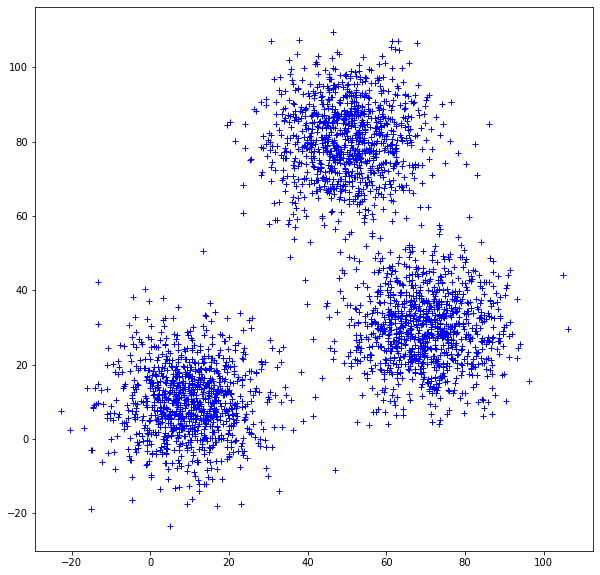

In [10]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')

In [11]:
# suppose we initialise 4 centroid st random

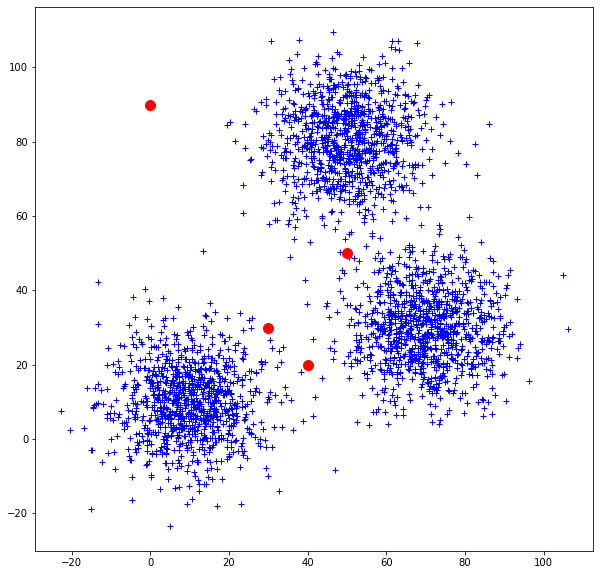

In [12]:
protos = array([[30,30],[40,20],[0,90],[50,50]]) # Initialize centroids
start = protos.copy()

figsize(10,10)
plot(data[:,0],data[:,1],'b+')
plot(protos[:,0],protos[:,1],'ro',markersize=10)

Obviously, those centers are wrong, but let's keep going.

Now, we compute the assignment of the data points to the prototypes
(array `closest`).
This is also wrong, but we're going to be using it anyay.

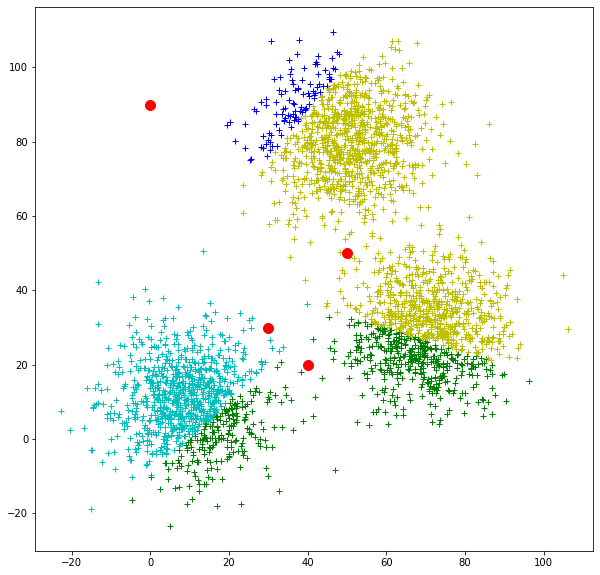

In [13]:
figsize(10,10)
dists = cdist(protos,data)    #calculate distance b/w protos and data
closest = argmin(dists,axis=0)   # whichever distance is minimum in 4 lists of dists is included here as cluster number
for i in range(len(protos)):
    plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [53]:
count=0
for i in closest:
    if i==3:
        count=count+1
print(count)

1506


In [54]:
history = [protos.copy()]

for i in range(len(protos)):
    protos[i,:] = average(data[closest==i],axis=0)
    
history.append(protos.copy())

In [57]:
history

[array([[30, 30],
        [40, 20],
        [ 0, 90],
        [50, 50]]),
 array([[ 7, 12],
        [50, 13],
        [36, 90],
        [59, 61]])]

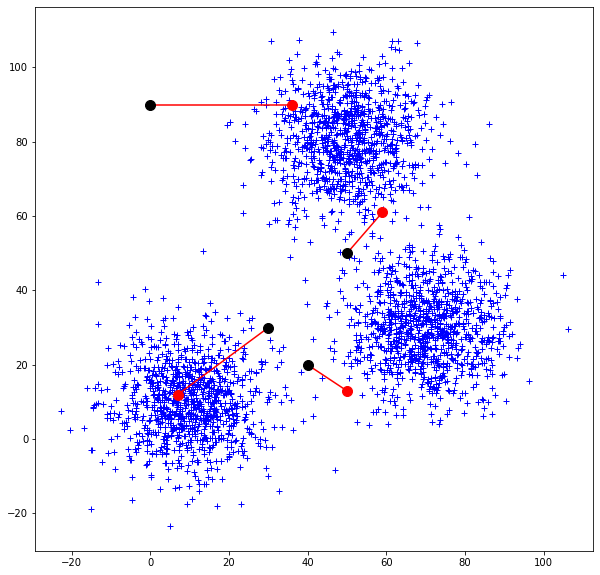

In [58]:
# Plotting the centroid movements
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
harray = array(history)
for i in range(len(protos)):
    plot(harray[:,i,0],harray[:,i,1],'r')
plot(harray[0,:,0],harray[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [59]:
harray

array([[[30, 30],
        [40, 20],
        [ 0, 90],
        [50, 50]],

       [[ 7, 12],
        [50, 13],
        [36, 90],
        [59, 61]]])

As you can see, the centers have moved, and it looks like they have generally moved in the right direction.

Now let's just repeat this process multiple times

In [63]:
for round in range(1000):
    if round%100==0: sys.stderr.write("%d "%round)
    dists = cdist(protos,data)
    closest = argmin(dists,axis=0)
    for i in range(len(protos)):
            protos[i,:] = average(data[closest==i],axis=0)
    history.append(protos.copy())

0 100 200 300 400 500 600 700 800 900 

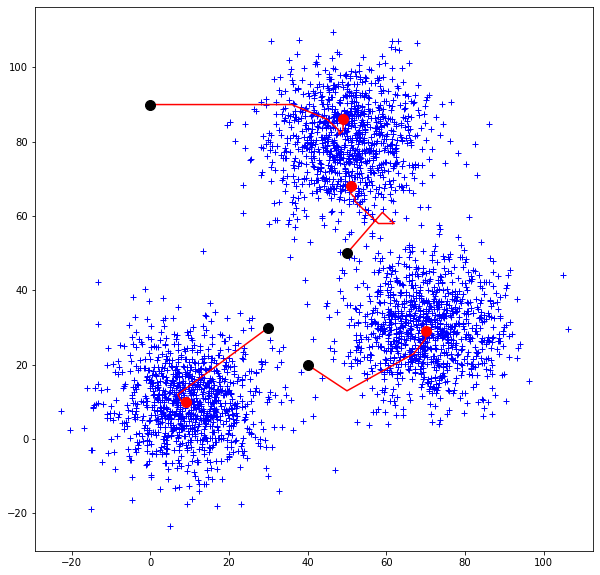

In [67]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
history = array(history)
for i in range(len(protos)):
    plot(history[:,i,0],history[:,i,1],'r')
plot(history[0,:,0],history[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

As you can see, the final location of the prototype centers (red) are nicely in the center of the classes. The algorithm doesn't give us exactly the cluster centers because there are three clusters but we postulated four cluster centers.

We can also look at the partition of the data induced by these cluster centers.

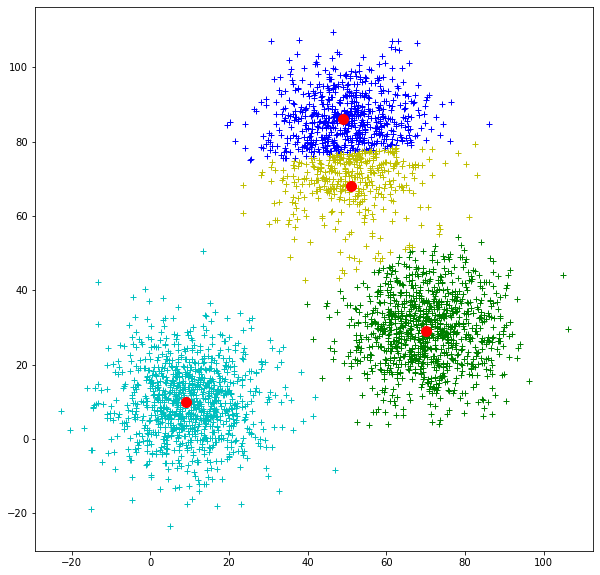

In [79]:
figsize(10,10)
dists = cdist(protos,data)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
    plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [80]:
# An optimum value of K is obtained using the Elbow Method.

 An example with actual data

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
dataset=pd.read_csv('Mall_Customers.csv')

In [83]:
dataset.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [84]:
#dataset
X=dataset.iloc[:,3:]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


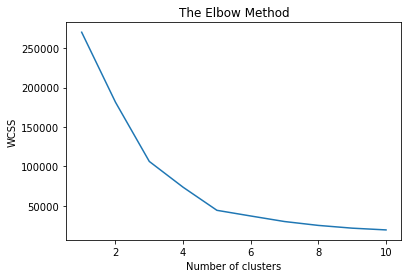

In [85]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# After k=5 the slope is not changing much so we take k=5

In [89]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [90]:
# It predicts the cluster number to which the datapoint belongs to
test=kmeans.predict(np.asarray([[10,12]]))
test[0]

3

In [11]:
# saving the model to the local file system
import pickle
filename = 'finalized_model.pickle'
pickle.dump(kmeans, open(filename, 'wb'))

In [13]:
# Looking at the points which belong to Cluster0
X[y_kmeans==0].head(3)

,Annual Income (k$),Spending Score (1-100)
1,15,81
3,16,77
5,17,76


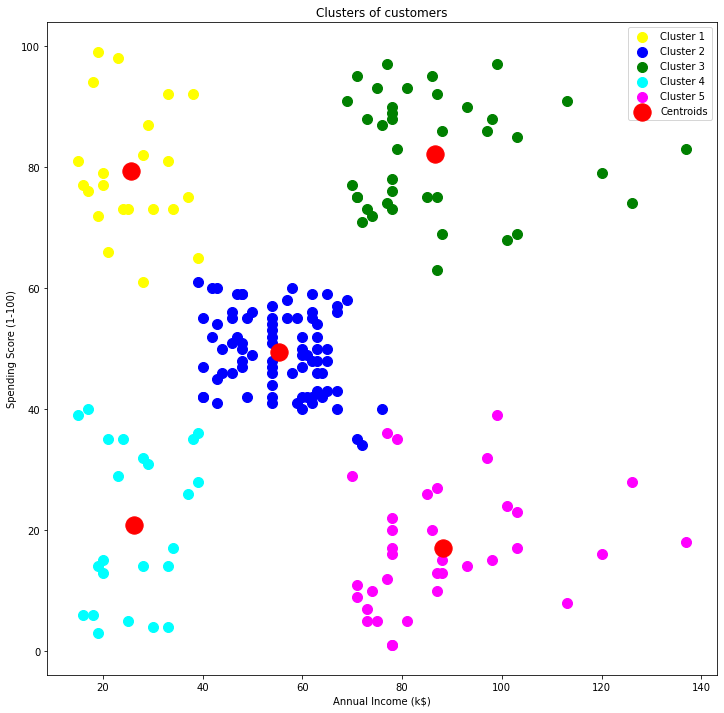

In [92]:
# Visualising the clusters
figsize(12,12)
plt.scatter(X[y_kmeans == 0]['Annual Income (k$)'], X[y_kmeans == 0]['Spending Score (1-100)'], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Annual Income (k$)'], X[y_kmeans == 1]['Spending Score (1-100)'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['Annual Income (k$)'], X[y_kmeans == 2]['Spending Score (1-100)'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['Annual Income (k$)'], X[y_kmeans == 3]['Spending Score (1-100)'], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['Annual Income (k$)'], X[y_kmeans == 4]['Spending Score (1-100)'], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()